In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.9 MB/s eta 0:00:00


In [3]:
#Import required libraries
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [23]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "Bears and Penguines in the island "
image = pipe(prompt).images[0]

image.save("Bears.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

***Script Explanation:***
 - **Import Required Libraries:**
   - `torch:` For working with tensors and enabling GPU acceleration.-
  - `StableDiffusionPipeline` and `DPMSolverMultistepScheduler` from the
  - `diffusers library:` To load and utilize the Stable Diffusion model and its
     advanced scheduler.
 - **Model Setup:**
    - The `StableDiffusionPipeline` is initialized using a pre-trained Stable Diffusion model `(stabilityai/stable-diffusion-2-1)`.
    - The DPM-Solver++ Scheduler `(DPMSolverMultistepScheduler)` is applied for efficient and high-quality image generation.
 - **Move Model to GPU:**
    - The pipeline is moved to the CUDA device (pipe.to("cuda")) to leverage GPU acceleration for faster inference.
 - **Text Prompt:**
   - The model processes the prompt: "In the sky stars,crescent moon, many planets ". This is an example of a creative input to test the photorealistic capabilities of the AI.
 - **Generate and Save the Image:**
    - The .`images[0]` extracts the first image generated by the pipeline.
    - The output is saved locally as stars.png.

In [9]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "Snow fall in mountains and in the sky and glazing sunlight"
image = pipe(prompt).images[0]

image.save("snowfall.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [25]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "Sunrise in the mountains with glazing light and lake surrounding with it, birds flying, rocks on the lake "
image = pipe(prompt).images[0]

image.save("sunrise.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [10]:
# compvis model integrain with stabel diffusion model

import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "Birds are flying on the sky, falling colors on trees, these are stayed beside the roads and cars are on the road "
image = pipe(prompt).images[0]

image.save("fallcolor.png")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
!nvidia-smi

Mon Dec 16 03:03:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0              34W /  70W |   5179MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
# Configuration Class
class CFG:
  device = "cuda"
  seed = 42
  generator = torch.Generator(device).manual_seed(seed)
  image_gen_steps = 35
  image_gen_model_id = "stabilityai/stable-diffusion-2-1"
  image_gen_size = (400,400)
  image_gen_guidance_scale = 9
  prompt_gen_model_id = "gpt-omni/mini-omni"
  prompt_dataset_size = 6
  prompt_max_lenghth = 12

**Explanation:**
- **1.device:** Specifies the device to use, typically "cuda" for GPU.
 or "cpu" for CPU
- **2. seed:** A fixed random seed for reproducibility, set to 42 in this case.
- **3. generator:** A PyTorch random number generator initialized with the specified seed on the given device. Useful for deterministic generation.
- **4. image_gen_steps:** Number of denoising steps for generating an image (used in diffusion models).
- **5. image_gen_model_id:** The identifier for the image generation model,
 e.g., Stable Diffusion.
- **6. image_gen_size:** A tuple representing the dimensions of the generated images (width x height).
- **7. image_gen_guidance_scale:** Controls the trade-off between the prompt and prior information in image generation models. Higher values enforce closer adherence to the prompt.
- **8. prompt_gen_model_id:** Identifier for the model used to generate prompts.
- **9. prompt_dataset_size:** Specifies the number of prompts or examples to retrieve.
- **10. prompt_max_length:** Defines the maximum length of generated prompts. (Note: Typo in attribute name; it should be prompt_max_length.)

In [16]:
# Load Stable Diffusion Model
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id,
    torch_dtype = torch.float16,
    revision='fp16',
    use_auth_token= '',  # Add a valid token if required
    guidance_scale=9
)

image_gen_model = image_gen_model.to(CFG.device)

model_index.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:221: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': '', 'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [17]:
# Function to Generate Image
def generate_image(prompt, model):
  image = model(
      prompt,
      num_inference_steps=CFG.image_gen_steps,
      generator = CFG.generator,
      guidance_scale=CFG.image_gen_guidance_scale
  ).images[0]
  image = image.resize(CFG.image_gen_size)
  return image

  0%|          | 0/35 [00:00<?, ?it/s]

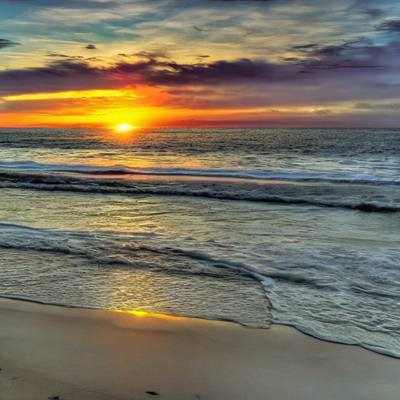

In [19]:
generate_image("sunset in the beach", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

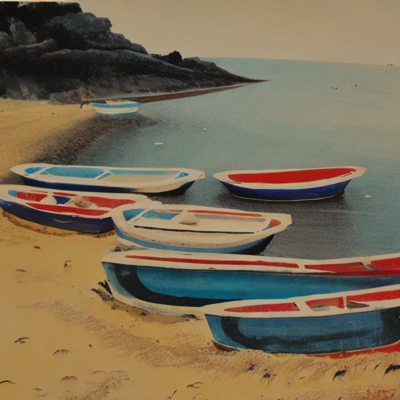

In [21]:
generate_image("Boats in sea shore", image_gen_model)